# Finding Heave Traffic Indicators on I-94

In this project we are going to analyze a dataset about the westbound traffic on the I-94 [Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The dataset has been made available by John Hogue and can be found [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume). The goal of our analysis is to determine a few indicators of heavy traffic on I-94. Let's start by reading our dataset.

In [146]:
#Reading the dataset
import pandas as pd

data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#Examine the first and the last five rows
print(data.head(5))
print(data.tail(5))

#More information about the dataset
data.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

The [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) points out that the station only records westbound traffic, and is located approximately midway between Minneapolis and Saint Paul. This means that we should not generalize our results for the entire highway, instead we are only analyzing the westbound traffic. Let's analyze the traffic volume next.

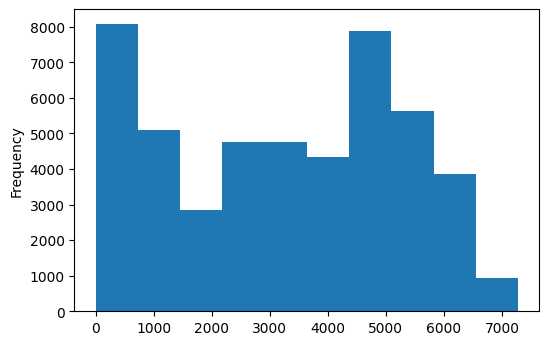

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
#this enables graphs in Jupyter

#Plotting a histogram for traffic volume
data['traffic_volume'].plot.hist()
plt.show()

In [148]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram and the result of describe we can see that the traffic volume's range is between 0 to 7280 cars. 25% of the time there are less than 1193 cars on the highway. Reason for these low numbers could be nighttime and construction work. 25% of the time there are over 4933 cars. Let's now take a closer look how different time of the day affects the traffic volume. For daytime we will be using hours from 7 a.m. to 7 p.m. and 7 p.m. to 7 a.m. for nighttime.

## Daytime vs. Nighttime

In [149]:
data["date_time"] = pd.to_datetime(data["date_time"])
daydata = data.copy()[(data["date_time"].dt.hour >= 7) & (data["date_time"].dt.hour < 19)]
nightdata = data.copy()[(data["date_time"].dt.hour >= 19) | (data["date_time"].dt.hour < 7)]

#Lets print the first 3 rows of both datasets:
print(daydata.head(3))
print("\n")
print(nightdata.head(3))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  


   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clear   

   weather_description           date_time  traffic_volume  
10          few clouds 2012-10-02 19:00:00            3539  
11        sky is clear 2012-10-02 20:00:00            2784  
12        sky is clear 2012-10-02 21:00:00            236

Now we have separated the nighttime data and the daytime data. Let's make histograms for both of them to explore more.

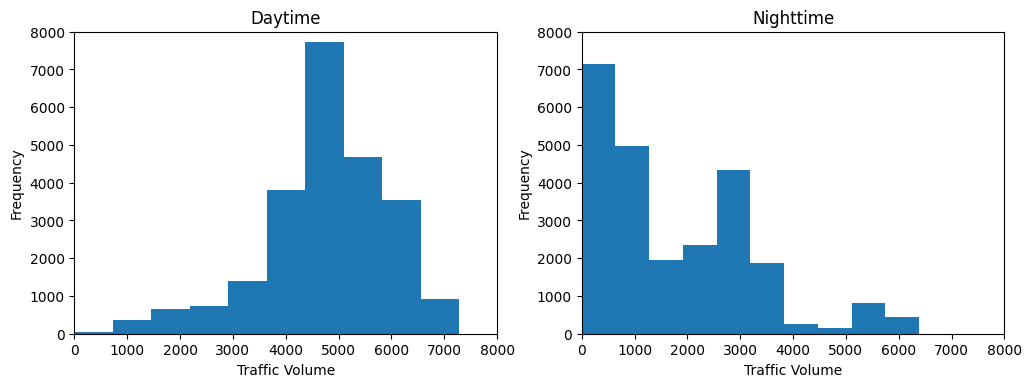

In [150]:
plt.figure(figsize =(12,4))

#Daytime
plt.subplot(1, 2, 1)
daydata["traffic_volume"].plot.hist()
plt.title("Daytime")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0, 8000)
plt.xlim(0, 8000)

#Nighttime
plt.subplot(1,2,2)
nightdata["traffic_volume"].plot.hist()
plt.title("Nighttime")
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")
plt.ylim(0, 8000)
plt.xlim(0, 8000)

plt.show()

In [151]:
print(daydata["traffic_volume"].describe())
print("\n")
print(nightdata["traffic_volume"].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


From the histograms we can see that the daytime histogram is left skewed, meaning that higher frequency values are on the right side of the histogram. This means that most of the time there are over 4000 cars during the daytime. Nighttime histogram on the other hand is right skewed, meaning that there is higher frequency for lower traffic volumes. We can also see from the descriptions that the mean for daytime traffic is 4762 cars, while it is only 1785 for nighttime traffic. The maximum value for nighttime traffic is 6386, but 75% of the time there are less than 2819 cars on the road. Because our goal is to find reasons that cause high traffic volume, we are only focusing on daytime data from now on.

## Time Indicators

One of the possible indicators for traffic volume is time, for example people driving to work and back to home at certain times. Next, we are going to take a look at months, days and hours to get a clearer picture how time affects traffic volume.

### Months

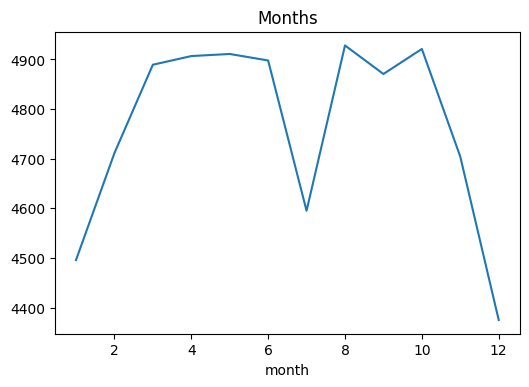

In [152]:
daydata["month"] = daydata["date_time"].dt.month
by_month = daydata.groupby('month').mean()

by_month["traffic_volume"].plot()
plt.title("Months")
plt.show()


From the graph above we can see that the traffic volume has a couple dips, on July and December. This could be because of holiday seasons. Warmer months also have higher traffic volume (excluding July). Overall the traffic volume stays kinda equal, the mean value is always around 4400-4900.

### Days

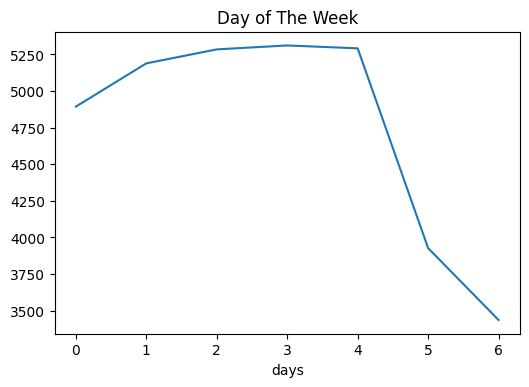

In [153]:
daydata["days"] = daydata["date_time"].dt.dayofweek
by_days = daydata.groupby("days").mean()
by_days["traffic_volume"].plot()
plt.title("Day of The Week")
plt.show()

The graph above shows that on days 5 (Saturday) and 6 (Sunday) there is less traffic than during weekdays. This can probably be explained by people going to work.

### Hours

We are going to separate the days of the week to businessdays (Mon-Fri) and weekends (Sat-Sun), to get a clearer picture for hours of the day.

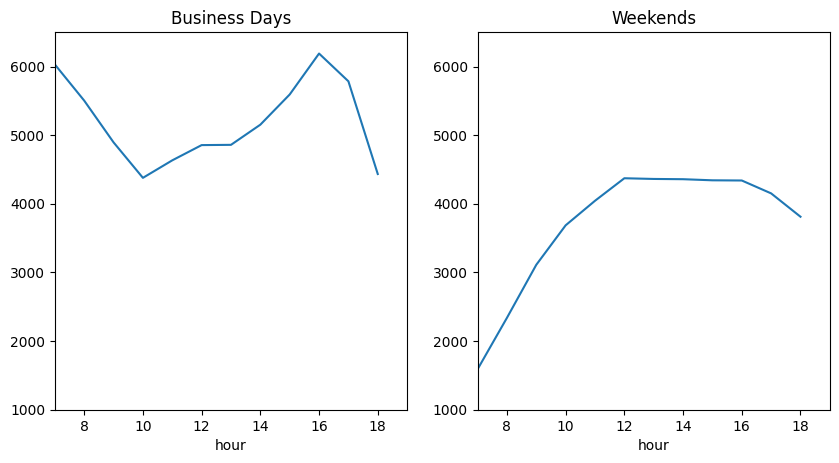

In [154]:
daydata["hour"] = daydata["date_time"].dt.hour
business_days = daydata.copy()[daydata["days"] <= 4] #4 == Friday
weekend = daydata.copy()[daydata["days"] >= 5] #5 == Saturday

by_hour_business = business_days.groupby("hour").mean()
by_hour_weekends = weekend.groupby("hour").mean()

#Business days
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot()
plt.title("Business Days")
plt.xlim(7,19) #daytime data was from 7 a.m. to 7 p.m.
plt.ylim(1000,6500)

#Weekends
plt.subplot(1,2,2)
by_hour_weekends["traffic_volume"].plot()
plt.title("Weekends")
plt.xlim(7,19)
plt.ylim(1000,6500)

plt.show()

From the graphs above we can see that during business days the traffic volume is highest at 7am, and then it starts to decrease. It increases between 3 p.m. and 5 p.m., before it starts to decrease again.

For weekends the traffic is highest between 12 p.m. and 4 p.m., but the volume is not as high as during business days. Business days traffic volume is around 4500-6000, while weekends traffic volume averages between 1800-4500.

## Summary: How Time Affects Traffic Volume

Above we noticed that seasons affect which months have the most traffic volume, with July and December being the months with less traffic. We also noticed that there is less traffic volume during weekends than during business days. The busiest hours for business days are at 7 a.m. and 3 p.m. to 5 p.m., with around 4500-6000 cars on the road. For weekends the traffic volume is highest between 12 p.m. and 4 p.m., but the volume is lower, between 1800 to 4500.

In conclusion we can suggest that one factor for higher traffic volumes is traffic to work and back.

## Weather

Another possible indicator of heavy traffic could be weather. We could expect for example that bad weather means more people using cars for transport. Because of this, let's now focus on weather. Let's remind ourselves what the weather columns were.

In [155]:
print(data.head(1))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  


In [156]:
#Finding correlations between traffic_volume and numerical weather columns
print(data["traffic_volume"].corr(data["temp"]))
print(data["traffic_volume"].corr(data["rain_1h"]))
print(data["traffic_volume"].corr(data["snow_1h"]))
print(data["traffic_volume"].corr(data["clouds_all"]))

0.13029879817112658
0.00471370236785923
0.0007334345358283799
0.06705377704283502


(200.0, 320.0)

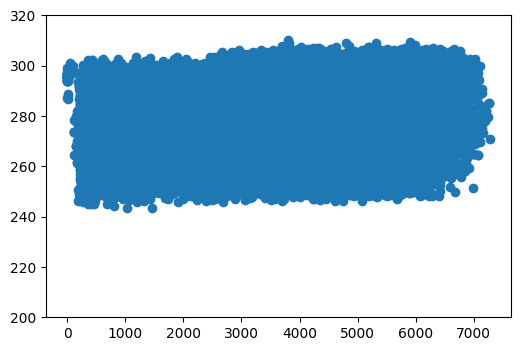

In [157]:
plt.scatter(data["traffic_volume"], data["temp"])
plt.ylim(200,320)

We can see that the highest correlation is between temperature and traffic volume, the second highest being clouds. Temperature could have something to do with traffic, but amount of clouds in the sky seems something that doesn't relate with traffic volume. We found out earlier that there is less traffic during cold months, so lower temperature could mean that people are less willing to drive, because of slippery roads for example. This however is hard to explain with just correlation, and the correlation is also very small, only 0.13. The scatter plot also visually shows that there isn't clear correlation between temperature and traffic volume. Let's now take a look at the categorical columns `weather_main` and `weather_description`.

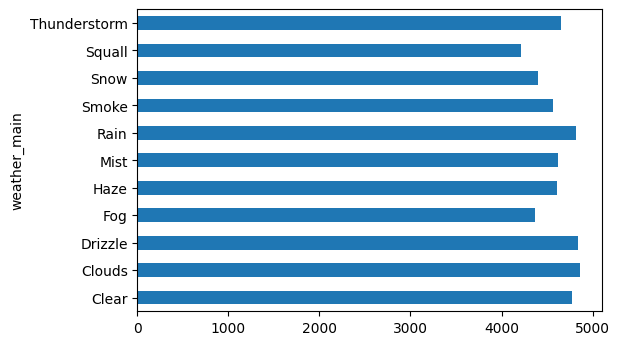

In [159]:
by_weather_main = daydata.groupby('weather_main').mean()
by_weather_description = daydata.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.show()

We can see that each category has volumes between 4000 and 5000, but none are exceeding 5000 cars. This graph doesn't provide much information about how weather affects traffic volume.

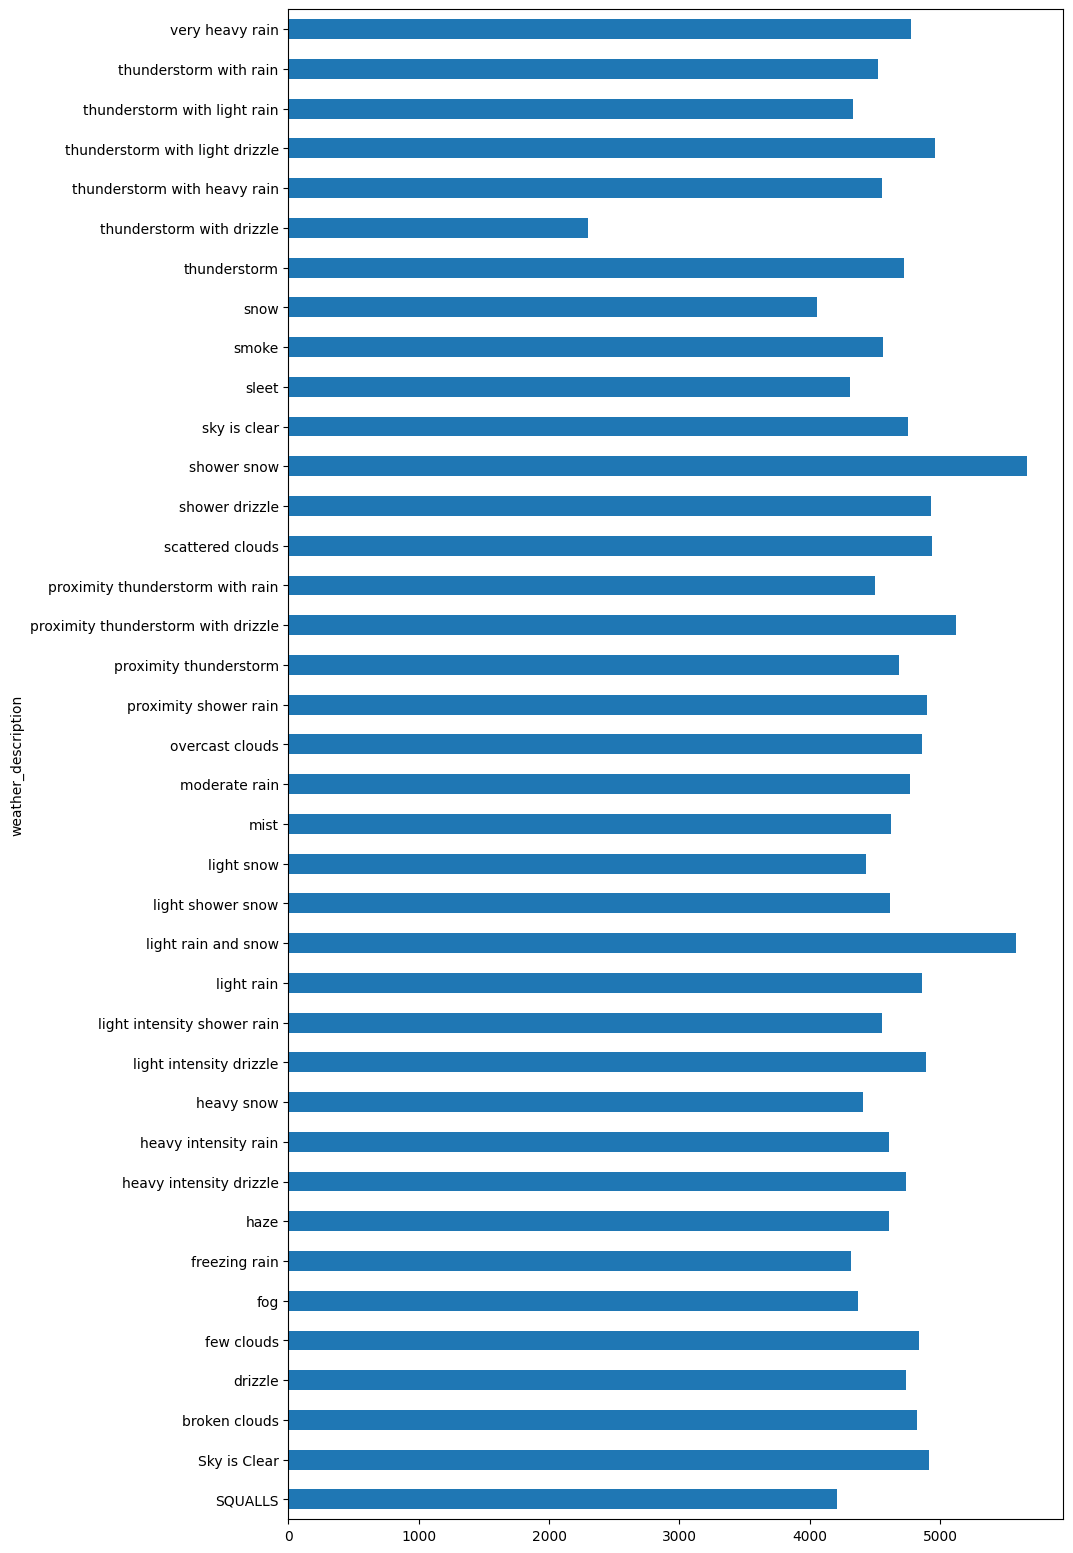

In [168]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,20))
plt.show()

There is a lot of data in this bar plot, but again it doesn't tell us much. In fact our previous guess about slippery streets is proven wrong, as this time the highest traffic volumes are during light rain and snow and showering snow, exceeding over 5000 cars. The small correlation between weather and traff

## Conclusion

In this project we analyzed a dataset about the westbound traffic on the I-94. We found out that weather doesn't affect the traffic volume, but time does. We noticed that holiday seasons affect which months have the most traffic volume, with July and December being the months with less traffic. We also noticed that there is less traffic volume during weekends than during business days. The busiest hours for business days are at 7 a.m. and 3 p.m. to 5 p.m., with around 4500-6000 cars on the road. For weekends the traffic volume is highest between 12 p.m. and 4 p.m., but the volume is lower, between 1800 to 4500.

In conclusion we can suggest that one factor for higher traffic volumes is traffic to work and back.